In [30]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from Functions import Correlations


In [31]:
df = pd.read_csv('train_clean.csv')
df.head(3)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,0,15674932,Okwudilichukwu,668,France,1,33.0,3,0.0,2,1.0,0.0,181449.97,0,1,0,0
1,1,15749177,Okwudiliolisa,627,France,1,33.0,1,0.0,2,1.0,1.0,49503.50,0,1,0,0
2,2,15694510,Hsueh,678,France,1,40.0,10,0.0,2,1.0,0.0,184866.69,0,1,0,0


## EDA

### Analisis de correlaciones

#### Pearson

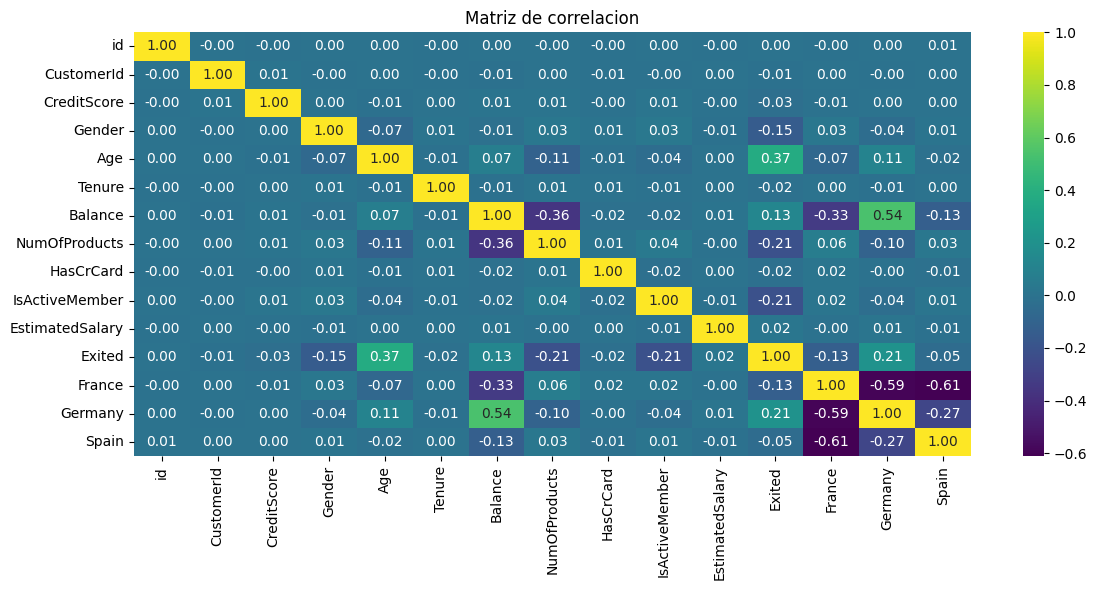

In [32]:
#GRAFICO DE MATRIZ DE CORRELACION PEARSON
matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12,6))
sns.heatmap(matrix, annot=True, fmt='.2f', cmap='viridis')
plt.title('Matriz de correlacion')
plt.tight_layout()
plt.show()


#### Coeficiente de punto biserial para variables dicotomicas y numericas

In [33]:
from scipy import stats

In [34]:
numeric_vars = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']

biserial_coef = [stats.pointbiserialr(df.Exited, df[var]) for var in numeric_vars]

df_corr = pd.DataFrame(index=numeric_vars, columns=['coef'])

for var,coef in zip(numeric_vars, biserial_coef):
    df_corr.loc[var, 'coef'] = coef.statistic

limit_value = df_corr.coef.abs().max()
limit_value = np.ceil(limit_value*10)/10

limit_value

0.4

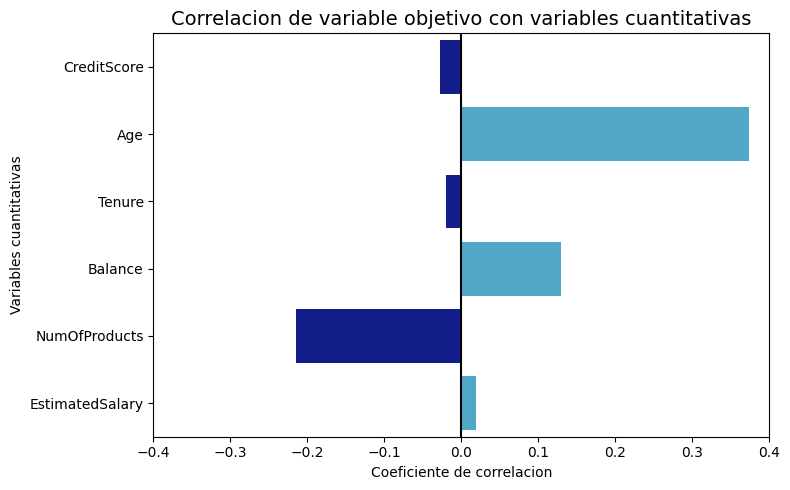

In [36]:
colors = ['#000E9E' if corr < 0 else '#3DB2DA' for corr in df_corr.coef]
plt.figure(figsize=(8,5))  
sns.barplot(x=df_corr.coef, y=df_corr.index, hue=df_corr.index, palette=colors)
plt.title(f'Correlacion de variable objetivo con variables cuantitativas', fontsize=14)
plt.xlabel('Coeficiente de correlacion')
plt.ylabel(f'Variables cuantitativas')
plt.xlim(-1*limit_value, limit_value)
plt.axvline(x=0, color='black', linestyle='-')
plt.tight_layout()
plt.show()
plt.style.use("default")          